In [1]:
import pandas as pd
import numpy as np
import pickle
from Commen_Functions import get_score, get_score_df, merge_Results, load_sets

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
SETS = 1
with open(f'/home/g0017139/UMCG_Thesis/Working_Code/Results/TSet{SETS}/Merged_results.pkl', 'rb') as f:
    results_grid = pickle.load(f)
with open(f'/home/g0017139/UMCG_Thesis/Working_Code/Results/TSet{SETS}/Merged_GridHDDC.pkl', 'rb') as f:
    bic_df = pickle.load(f)
with open(f'/home/g0017139/UMCG_Thesis/Working_Code/Results/TSet{SETS}/MergedClustersHDDC.pkl', 'rb') as f:
    clustersHDDC = pickle.load(f)

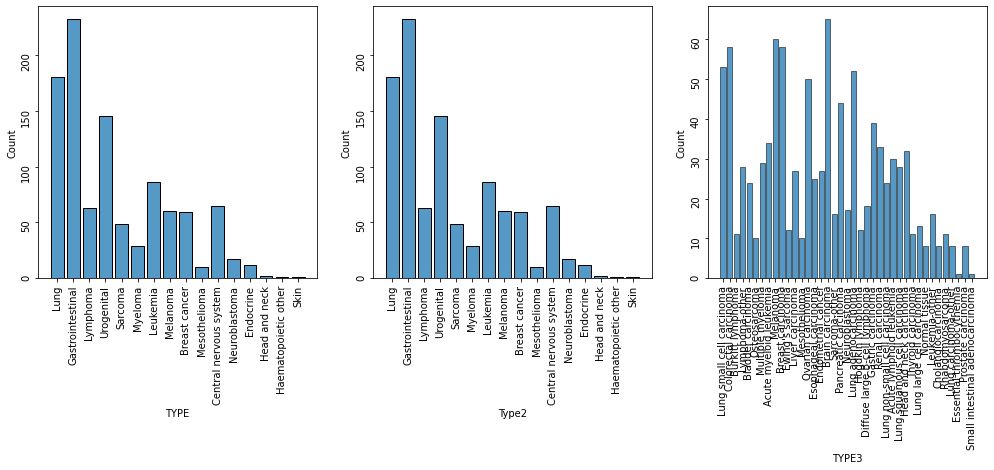

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
df, df_normalized, Type_df = load_sets(1)
fig, (ax1, ax2, ax3) = plt.subplots(1,3 ,figsize=(17,5))
sns.histplot(data=df, x="TYPE", shrink=.8, ax=ax1)
ax1.tick_params(labelrotation=90)
sns.histplot(data=df, x="Type2", shrink=.8, ax=ax2)
ax2.tick_params(labelrotation=90)
sns.histplot(data=df, x="TYPE3", shrink=.8, ax=ax3)
ax3.tick_params(labelrotation=90)
plt.show()

In [5]:
df, df_normalized, Type_df = load_sets(2)

In [6]:
df.groupby('TYPE').count()['2597'].sort_values()

TYPE
Cholangiocarcinoma                    4
Vulva cancer                          8
Periampullary cancer                  9
primitive neuroectodermal tumor      22
Bladder cancer                       39
Cervical cancer                      62
Pancreas cancer                      81
Thyroid cancer                       97
Esophageal cancer                    97
Adrenal cancer                      137
Ovarian cancer                      187
Renal cancer                        304
Prostate cancer                     308
Gastric cancer                      332
Myelodysplastic syndrome            342
Sarcoma                             344
HCC                                 364
HNSCC                               386
Melanoma                            504
Lymphoma                            961
Brain cancer                       1115
Multiple myeloma                   1316
Lung cancer                        1527
Colorectal cancer                  2710
Breast cancer                      

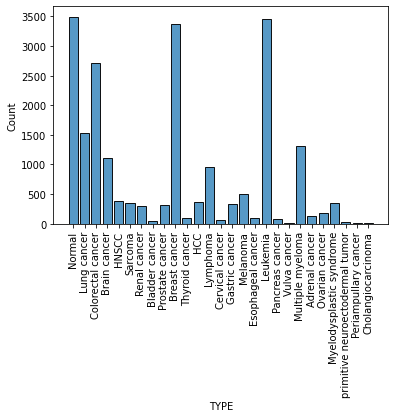

In [7]:
sns.histplot(data=df, x="TYPE", shrink=.8)
plt.xticks(rotation=90)
plt.show()

In [8]:
df, df_normalized, Type_df = load_sets(4)

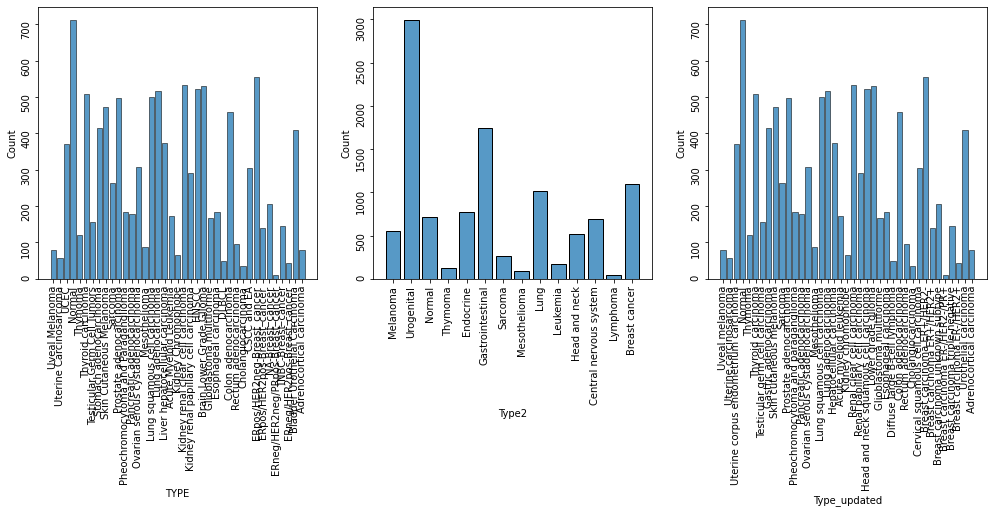

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3 ,figsize=(17,5))
sns.histplot(data=df, x="TYPE", shrink=.8, ax=ax1)
ax1.tick_params(labelrotation=90)
sns.histplot(data=df, x="Type2", shrink=.8, ax=ax2)
ax2.tick_params(labelrotation=90)
sns.histplot(data=df, x="Type_updated", shrink=.8, ax=ax3)
ax3.tick_params(labelrotation=90)
plt.show()

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
# loads = [(2, 'TYPE', -1, 'GPL570'), (1, 'TYPE', -3, 'CCLE'), (4, 'Type2', -5, 'TCGA')]
# for load in loads:
#     df, df_normalized, Type_df = load_sets(load[0])
#     for cancer_type, sub_df in df.groupby(load[1]):
#         sub_df = sub_df.select_dtypes([np.number])
#         scaler = StandardScaler()
#         values = scaler.fit_transform(sub_df)
#         cancer_norm_df = pd.DataFrame(values, columns = sub_df.columns, index=sub_df.index)
#         cancer_norm_df.to_csv(f'/data/g0017139/ICA_files/{load[3]}__Type_{cancer_type}.csv')
#     #temp_df = df.copy()
#     #try:
#     #    temp_df.iloc[:,:load[2]] = df_normalized.values
#     #except AttributeError: 
#     #    temp_df.iloc[:,:load[2]] = df_normalized
#     #for cancer_type, sub_df in temp_df.groupby(load[1]):
#     #    sub_df = sub_df.select_dtypes([np.number])
#     #    sub_df.to_csv(f'/data/g0017139/ICA_files/{load[3]}__Type_{cancer_type}.csv')



In [12]:
df, df_normalized, Type_df = load_sets(SETS)

In [13]:
from distinctipy import distinctipy
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
def make_colors(df):
    cluster_colors = distinctipy.get_colors(max(15, len(set(df['Type']))),
                                colorblind_type='Deuteranomaly', n_attempts=10_000)
    cluster_colors = ['#%02x%02x%02x' % tuple((np.array(x)  * 250).astype(int)) for x in cluster_colors]

    color_mapper = dict(zip(set(df['Type']), cluster_colors))
    palette = []
    for key in sorted(color_mapper):
        palette.append(color_mapper[key])
    palette = sns.color_palette(palette)
    return cluster_colors, color_mapper, palette

In [14]:
def make_countplot(df, x, hue, pallete): 
    pallette = sns.set_palette(pallete)
    # Make the figure
    fig = plt.figure(figsize=(15,8))
    df = df.sort_values(hue)
    g = sns.countplot(x=x, hue=hue, palette=pallette, edgecolor=".6", 
                      data=df)
    g.get_legend().remove()
    g.set_title('Absoulte counts')
    
    fig2 = plt.figure(figsize=(15,8))
    counts = (df.groupby([hue])[x]
              .value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values(hue))
    g1 = sns.barplot(x=x, y="percentage", hue=hue,
                     data=counts, palette=pallette, edgecolor=".6")

    g1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    g1.set_title('Relative counts')
    return fig, fig2

In [15]:
Entrez_Map = pd.read_csv('/data/g0017139/Set1/Entrezid_mapping_using_org_Hs_eg_db_03052021.txt',
                               sep=None, engine='python', header=0,
)
Entrez_Map.sort_values(['CHR_Mapping', 'BP_Mapping'], axis=0, inplace=True)

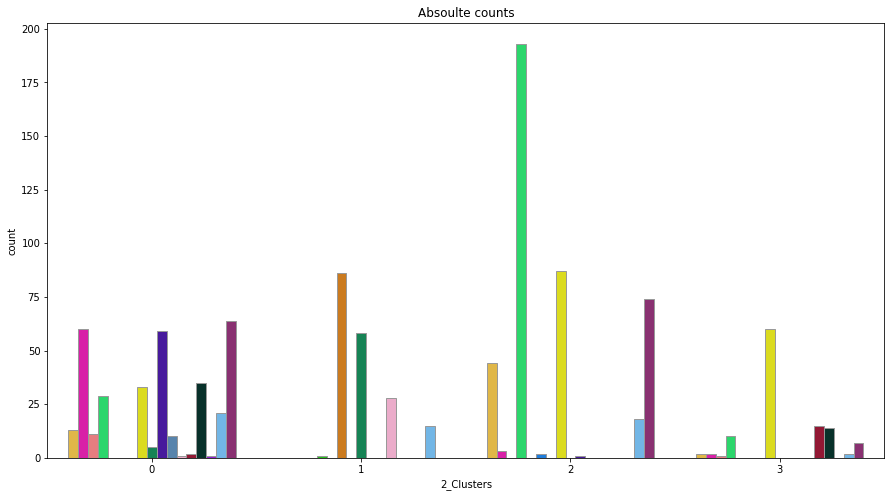

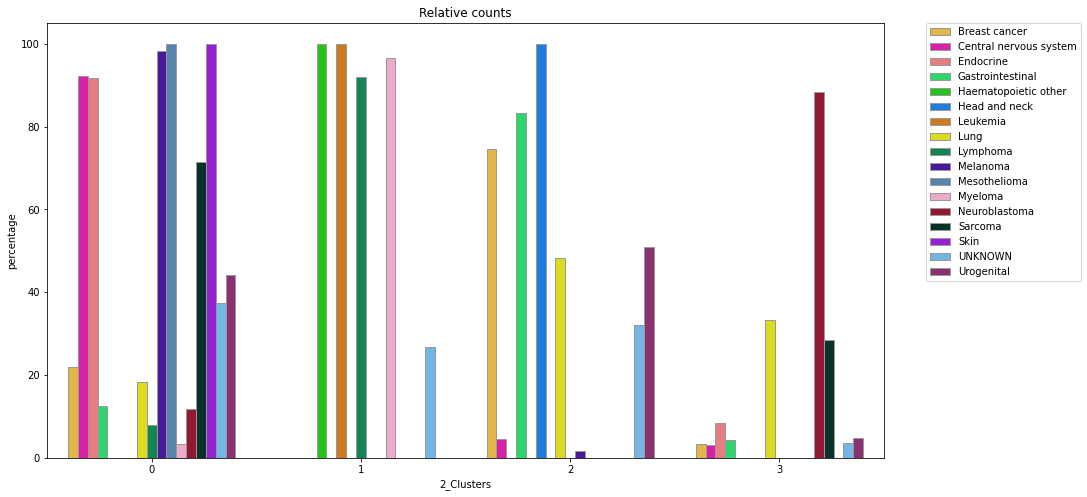

In [16]:
cluster_df = pd.read_csv(f"/home/g0017139/UMCG_Thesis/Working_Code/Results/TSet{SETS}/HDDCClusters4.csv", index_col=0)
cluster_df.columns = ['2_Clusters']
cluster_df['2_Clusters'] = cluster_df['2_Clusters'] - 1
cluster_df['Type'] = df['TYPE'].values
cluster_df = cluster_df.fillna('UNKNOWN')
cluster_colors, color_mapper, palette = make_colors(cluster_df)
make_countplot(cluster_df, '2_Clusters', 'Type', palette)
plt.show()

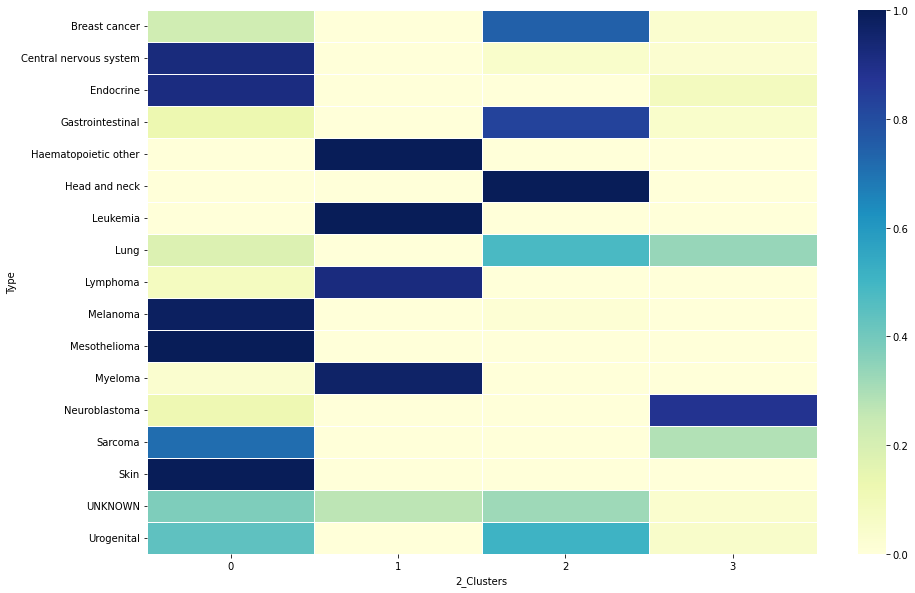

In [17]:
cluster_df['count'] = 1
count_df = cluster_df.groupby(['2_Clusters', 'Type']).sum().reset_index()
sum_df = cluster_df.groupby(['Type']).sum()
new_col = []
for index, row in count_df.iterrows():
    new_col.append(sum_df.loc[row['Type'],:]['count'])

count_df['Percentage'] = count_df['count'] / new_col
count_df = count_df.drop('count', axis=1)
data = pd.pivot_table(count_df, values='Percentage', index='Type', columns='2_Clusters', fill_value=0)
plt.figure(figsize=(15,10))
ax = sns.heatmap(data, vmin=0, vmax=1, linewidths=.5, cmap="YlGnBu")

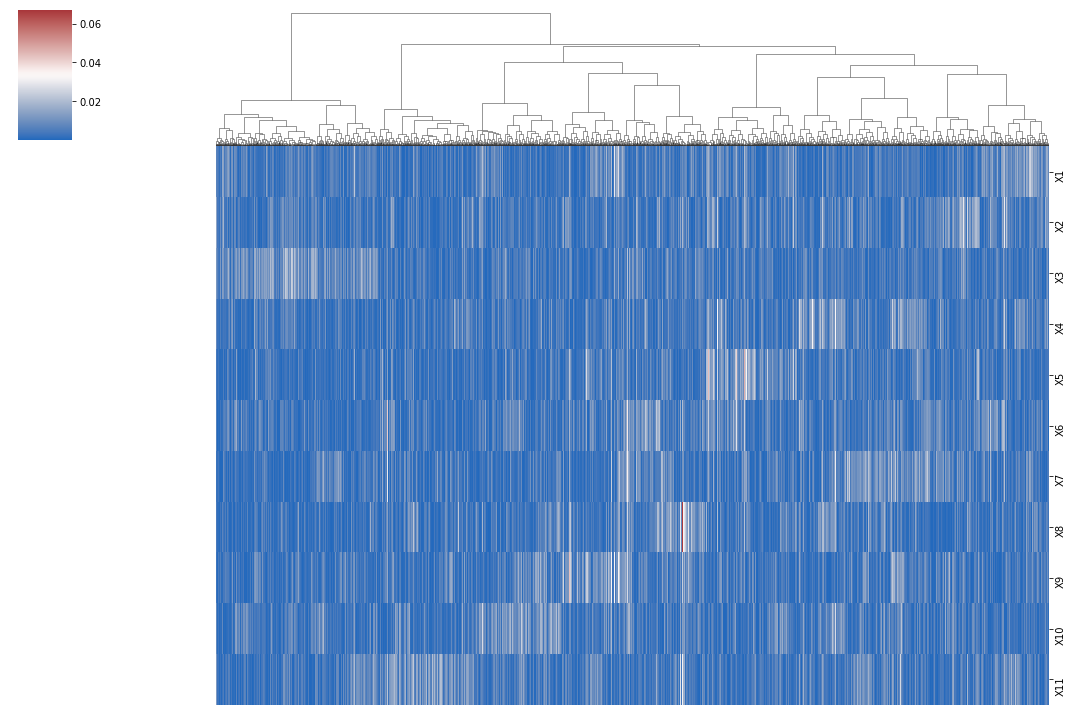

In [18]:
eigenvectors = pd.read_csv(f"/home/g0017139/UMCG_Thesis/Working_Code/Results/TSet{SETS}/eigenvec1clusters4.csv", index_col=0)

sns.clustermap(eigenvectors.abs().T, xticklabels=False, method="ward", metric="correlation",
               row_cluster=False,  cmap="vlag", figsize=(15,10))
plt.show()

In [19]:
eigenvectors = eigenvectors.abs()
if SETS == 1:
    eigenvectors.index = df.columns[:-3]
elif SETS == 2:
     eigenvectors.index = df.columns[:-1]
elif SETS == 3:
    eigenvectors.index = df.columns[:-5]

In [20]:
def get_genes(eigenvectors):
    important_genes = []
    ids = []
    for column in eigenvectors:
        value = str(eigenvectors.index[eigenvectors[column].argmax()])
        if value not in ids:
            ids.append(str(value))
        eigenvectors.index = [str(x) for x in eigenvectors.index]
        weight = eigenvectors[column][value]
        title = column.replace('X', 'Component ')
        important_genes.append((title,value,weight))
    #important_genes.append(('Test', '3198', 0.012))
    #ids.append('3198')
    Entrez_Map['mapped_entrez_v1'] = Entrez_Map['mapped_entrez_v1'].astype(str)
    important_genes_df = Entrez_Map[Entrez_Map['mapped_entrez_v1'].isin(ids)]
    return important_genes, important_genes_df, ids


In [21]:
important_genes, important_genes_df, ids = get_genes(eigenvectors)

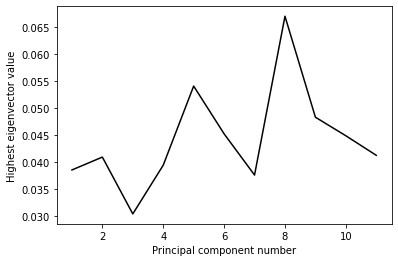

In [22]:
x_axis = []
y_axis = []
for i, x in enumerate(important_genes):
    x_axis.append(i + 1)
    y_axis.append(x[2])
sns.lineplot(x=x_axis, y=y_axis, color='black')
plt.xlabel('Principal component number')
plt.ylabel('Highest eigenvector value')
plt.show()

In [23]:
print(' '.join(important_genes_df['SYMBOL'].astype(str).values))

MNDA HMCES PRDM8 MIR3945HG HMHB1 CD3E CD3D DTX1 TNFRSF17 LINC00158 SH2D1A


In [24]:
important_genes

[('Component 1', '608', 0.0385099848811188),
 ('Component 2', '1840', 0.0408974941646504),
 ('Component 3', '56978', 0.0303569234181272),
 ('Component 4', '4068', 0.0393953972621803),
 ('Component 5', '4332', 0.0540702809653284),
 ('Component 6', '731424', 0.0452151061559402),
 ('Component 7', '915', 0.0375675331903686),
 ('Component 8', '57824', 0.067025354257567),
 ('Component 9', '54072', 0.0482984561620745),
 ('Component 10', '916', 0.0448528448304677),
 ('Component 11', '56941', 0.0412268595899284)]

In [25]:
Entrez_Map = pd.read_csv('/data/g0017139/Set1/Entrezid_mapping_using_org_Hs_eg_db_03052021.txt',
                               sep=None, engine='python', header=0,
)
Entrez_Map.sort_values(['CHR_Mapping', 'BP_Mapping'], axis=0, inplace=True)
Entrez_Map = Entrez_Map[['mapped_entrez_v1', 'CHR_Mapping', 'BP_Mapping']]
Entrez_Map.columns = ['gene_id', 'CHR_Mapping', 'BP_Mapping']
Entrez_Map.to_csv('/data/g0017139/EntrezMapping.tsv', sep = '\t', index=False)

In [26]:
# mapped_entrez_v1 , CHR_Mapping, BP_Mapping, same names, tab seperated

In [27]:
important_genes_df

,mapped_entrez_v1,CHR_Mapping,BP_startloc,BP_endloc,sense_or_antisense,GENENAME,SYMBOL,BP_Mapping
20444,4332,1,158831350.0,158849502.0,1,myeloid cell nuclear differentiation antigen,MNDA,1.588404e+08
18320,56941,3,129278894.0,129305589.7,1,"5-hydroxymethylcytosine binding, ES cell specific",HMCES,1.292922e+08
13982,56978,4,80191385.5,80204328.0,1,PR/SET domain 8,PRDM8,8.019786e+07
21307,731424,4,184843295.0,184855652.0,-1,MIR3945 host gene,MIR3945HG,1.848495e+08
19432,57824,5,143812160.0,143820719.0,1,histocompatibility minor HB-1,HMHB1,1.438164e+08
17373,916,11,118304579.0,118316175.0,1,CD3e molecule,CD3E,1.183104e+08
17376,915,11,118339073.0,118342744.0,-1,CD3d molecule,CD3D,1.183409e+08
16993,1840,12,113057856.0,113098028.0,1,deltex E3 ubiquitin ligase 1,DTX1,1.130779e+08
2459,608,16,11965209.0,11968068.0,1,TNF receptor superfamily member 17,TNFRSF17,1.196664e+07
4568,54072,21,25385819.0,25431701.0,-1,long intergenic non-protein coding RNA 158,LINC00158,2.540876e+07


In [28]:
df.columns = [str(x) for x in df.columns]
get_cols = [str(x) for x in ids]
#get_cols = [str(x) for x in df.columns]
get_cols.append('TYPE')

box_df = df[get_cols].copy()

box_df['Clusters'] = cluster_df['2_Clusters'].values

box_df = box_df.fillna('UNKNOWN')

In [29]:
from scipy.stats import mannwhitneyu, kruskal
from statsmodels.stats.multicomp import pairwise_tukeyhsd
def man_witney(df, genes):
    for x in genes:
        a = df[df['Clusters'] == 1][x[1]].values
        b = df[df['Clusters'] == 2][x[1]].values
        p = mannwhitneyu(a, b)[1]
        if p < 0.05:
            print(f'Gene \u001b[36m{x[1]}\x1b[0m has a p value of {p}')
        else:
            print(f'Gene {x[1]} has a p value of {p}')

def kruskal_test(df, genes):
    sig_genes = []
    for x in genes:
        groups = []
        for y in df['Clusters'].unique():
            groups.append(df[df['Clusters'] == y][x[1]].values)
        p = kruskal(*groups)[1]
        if p < 0.05:
            sig_genes.append(x)
            print(f'Gene \u001b[36m{x[1]}\x1b[0m has a p value of {p}')
        else:
            print(f'Gene {x[1]} has a p value of {p}')
    return sig_genes

In [30]:
from scipy.stats import mannwhitneyu
#important_genes = [('test', x, 0) for x in df.columns]
significant_genes = kruskal_test(box_df, important_genes)

Gene 608 has a p value of 6.307504911019619e-41
Gene 1840 has a p value of 1.8463446714146942e-08
Gene 56978 has a p value of 0.0003214670859246531
Gene 4068 has a p value of 1.4943486501080844e-20
Gene 4332 has a p value of 4.806207868339331e-14
Gene 731424 has a p value of 5.338369816143527e-07
Gene 915 has a p value of 7.751411803586155e-18
Gene 57824 has a p value of 1.2206927062195087e-09
Gene 54072 has a p value of 4.1338045116824853e-13
Gene 916 has a p value of 3.388778671574734e-22
Gene 56941 has a p value of 7.758575108586834e-10


In [31]:
tukey = pairwise_tukeyhsd(endog=box_df['1840'],
                          groups=box_df['Clusters'],
                          alpha=0.05)
results = pd.DataFrame(data=tukey._results_table.data[1:], columns=tukey._results_table.data[0])
results = results[results['reject'] == True]
results = results[((results['group1'] == 1) | (results['group2'] == 1))]
results

,group1,group2,meandiff,p-adj,lower,upper,reject
0,0,1,1.2069,0.001,0.9952,1.4186,True
3,1,2,-1.1758,0.001,-1.3805,-0.9711,True
4,1,3,-0.8189,0.001,-1.0968,-0.5410,True


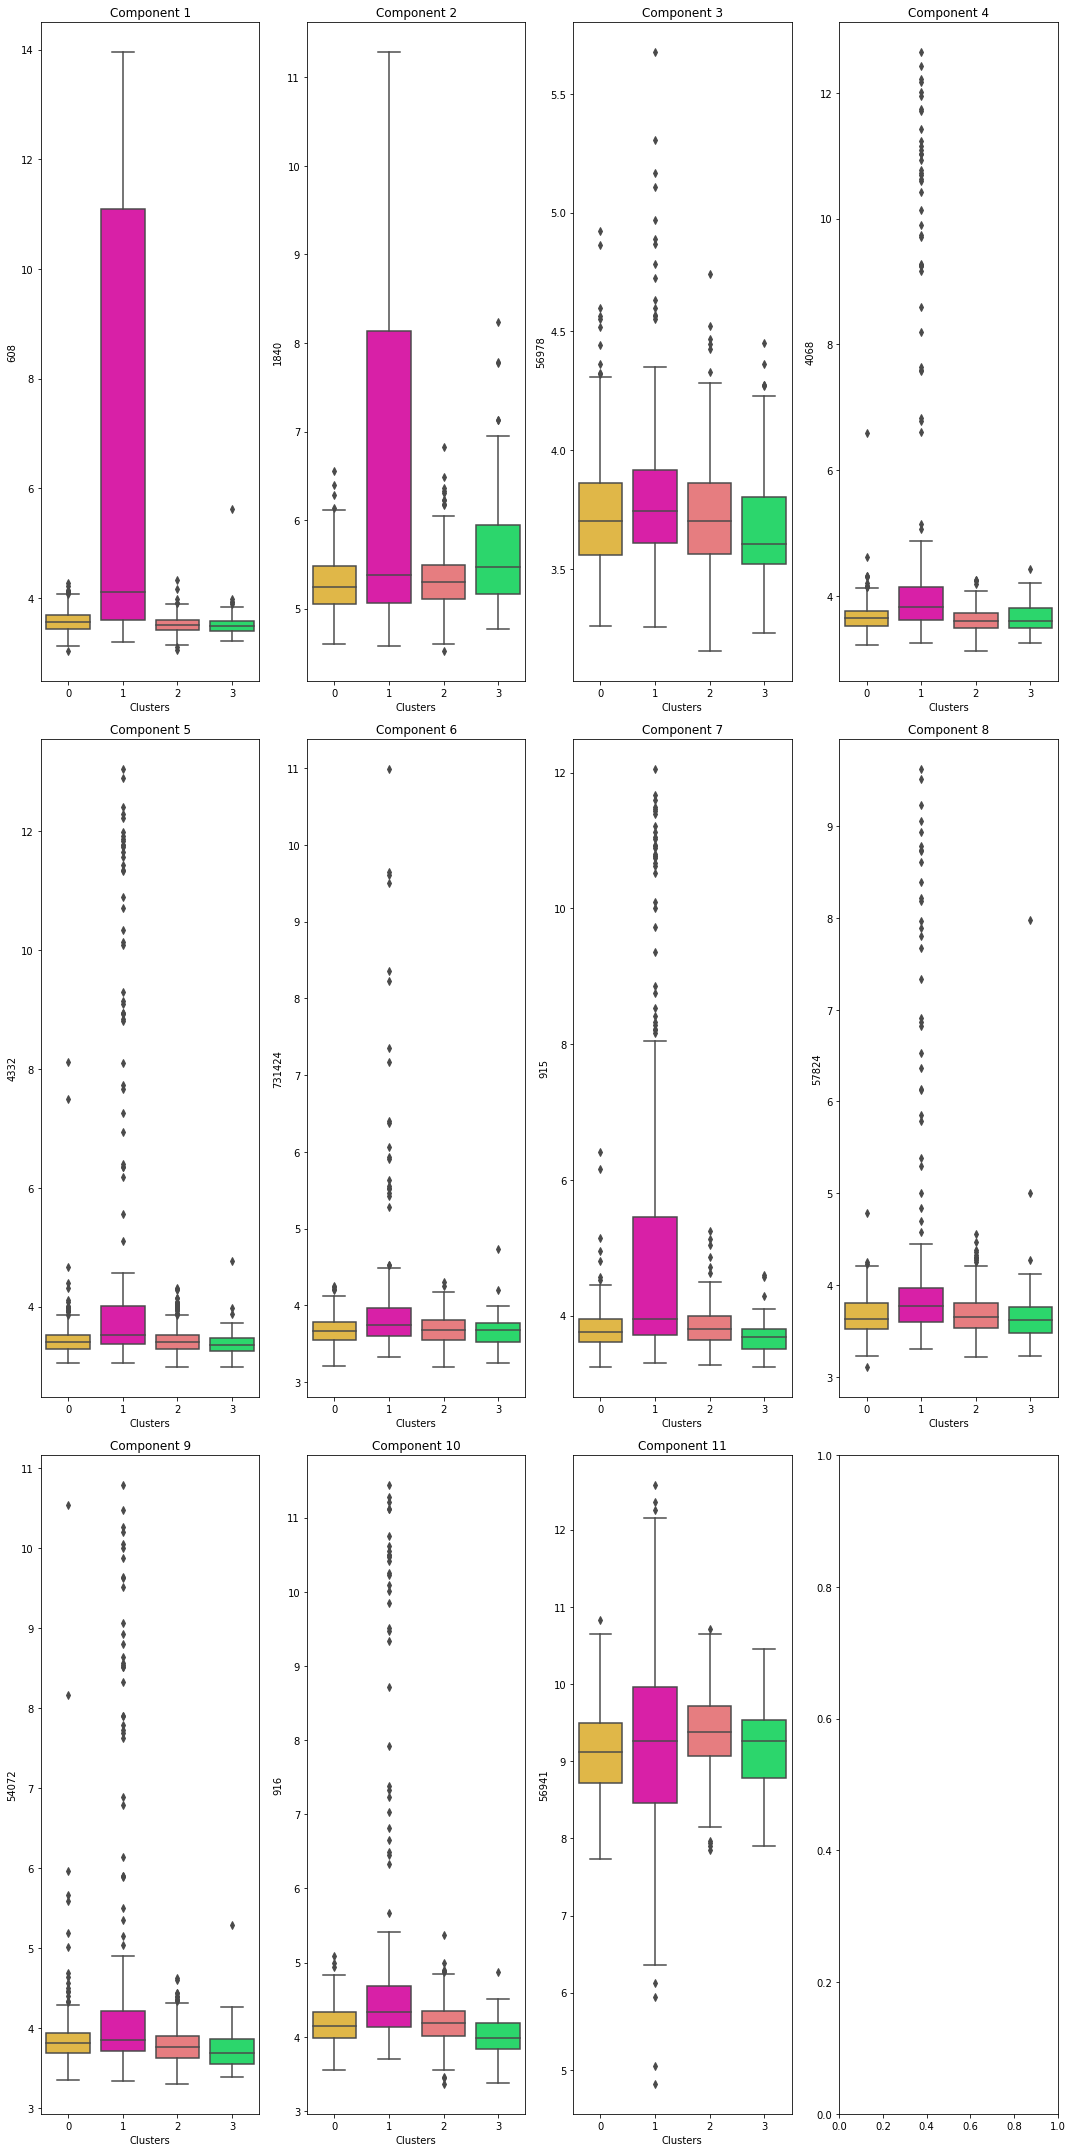

In [32]:
def make_boxplots(df, genes):
    size = len(genes) // 4
    if len(genes) % 4 != 0:
        size += 1
    fig, axs = plt.subplots(size,4, figsize=(15,30))
    i = 0
    axs = axs.ravel()
    for x in genes:
        sns.boxplot(x="Clusters", y=x[1], data=df,ax=axs[i])
        axs[i].set_title(x[0])
        i += 1
    fig.tight_layout()
make_boxplots(box_df, important_genes)